In [1]:
%matplotlib inline

In [2]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

/tmp/ipykernel_1893727/2441880800.py:2: DeprecationWarning: Accessing jax.config via the jax.config submodule is deprecated.
  from jax.config import config


In [3]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os
from scipy.sparse import csr_matrix

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

['default', 'despine']


In [4]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/driver_features"

In [5]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas_revision/plots/OT_encodrine_analysis/TemporalProblem.pkl")

In [6]:
tp0.adata.X = tp0.adata.layers["raw_counts"].copy()
sc.pp.normalize_total(tp0.adata)
sc.pp.log1p(tp0.adata)

In [7]:
cts = set(tp0.adata.obs["cell_type"].cat.categories)

In [8]:
annotation = {"time": [15.5, 16.5]}

# Alpha

In [9]:
tp0.pull(14.5, 15.5, data="cell_type", subset="Alpha",  key_added = "Alpha_pull_early", normalize=False)
tp0.pull(15.5, 16.5, data="cell_type", subset="Alpha",  key_added = "Alpha_pull_late", normalize=False)
tp0.adata.obs["Alpha_pull"] = tp0.adata.obs["Alpha_pull_early"] + tp0.adata.obs["Alpha_pull_late"]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning:

In [10]:
tp0.adata.obs["Alpha_pull_adapted"] = tp0.adata.obs["Alpha_pull"] * (tp0.adata.obs["cell_type"] != "Fev+ Alpha")

In [11]:
alpha_drivers = tp0.compute_feature_correlation(obs_key="Alpha_pull_adapted", annotation=annotation)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [12]:
alpha_drivers

,Alpha_pull_adapted_corr,Alpha_pull_adapted_pval,Alpha_pull_adapted_qval,Alpha_pull_adapted_ci_low,Alpha_pull_adapted_ci_high
Gcg,0.637172,0.0,0.0,0.620718,0.653066
Cltrn,0.624803,0.0,0.0,0.607922,0.641120
Peg10,0.595437,0.0,0.0,0.577578,0.612726
Wnk3,0.592936,0.0,0.0,0.574996,0.610306
Mctp2,0.580220,0.0,0.0,0.561874,0.597996
...,...,...,...,...,...
Igkv6-32,NaN,NaN,NaN,NaN,NaN
Hgf,NaN,NaN,NaN,NaN,NaN
Fgf5,NaN,NaN,NaN,NaN,NaN
Cyp26a1,NaN,NaN,NaN,NaN,NaN


/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


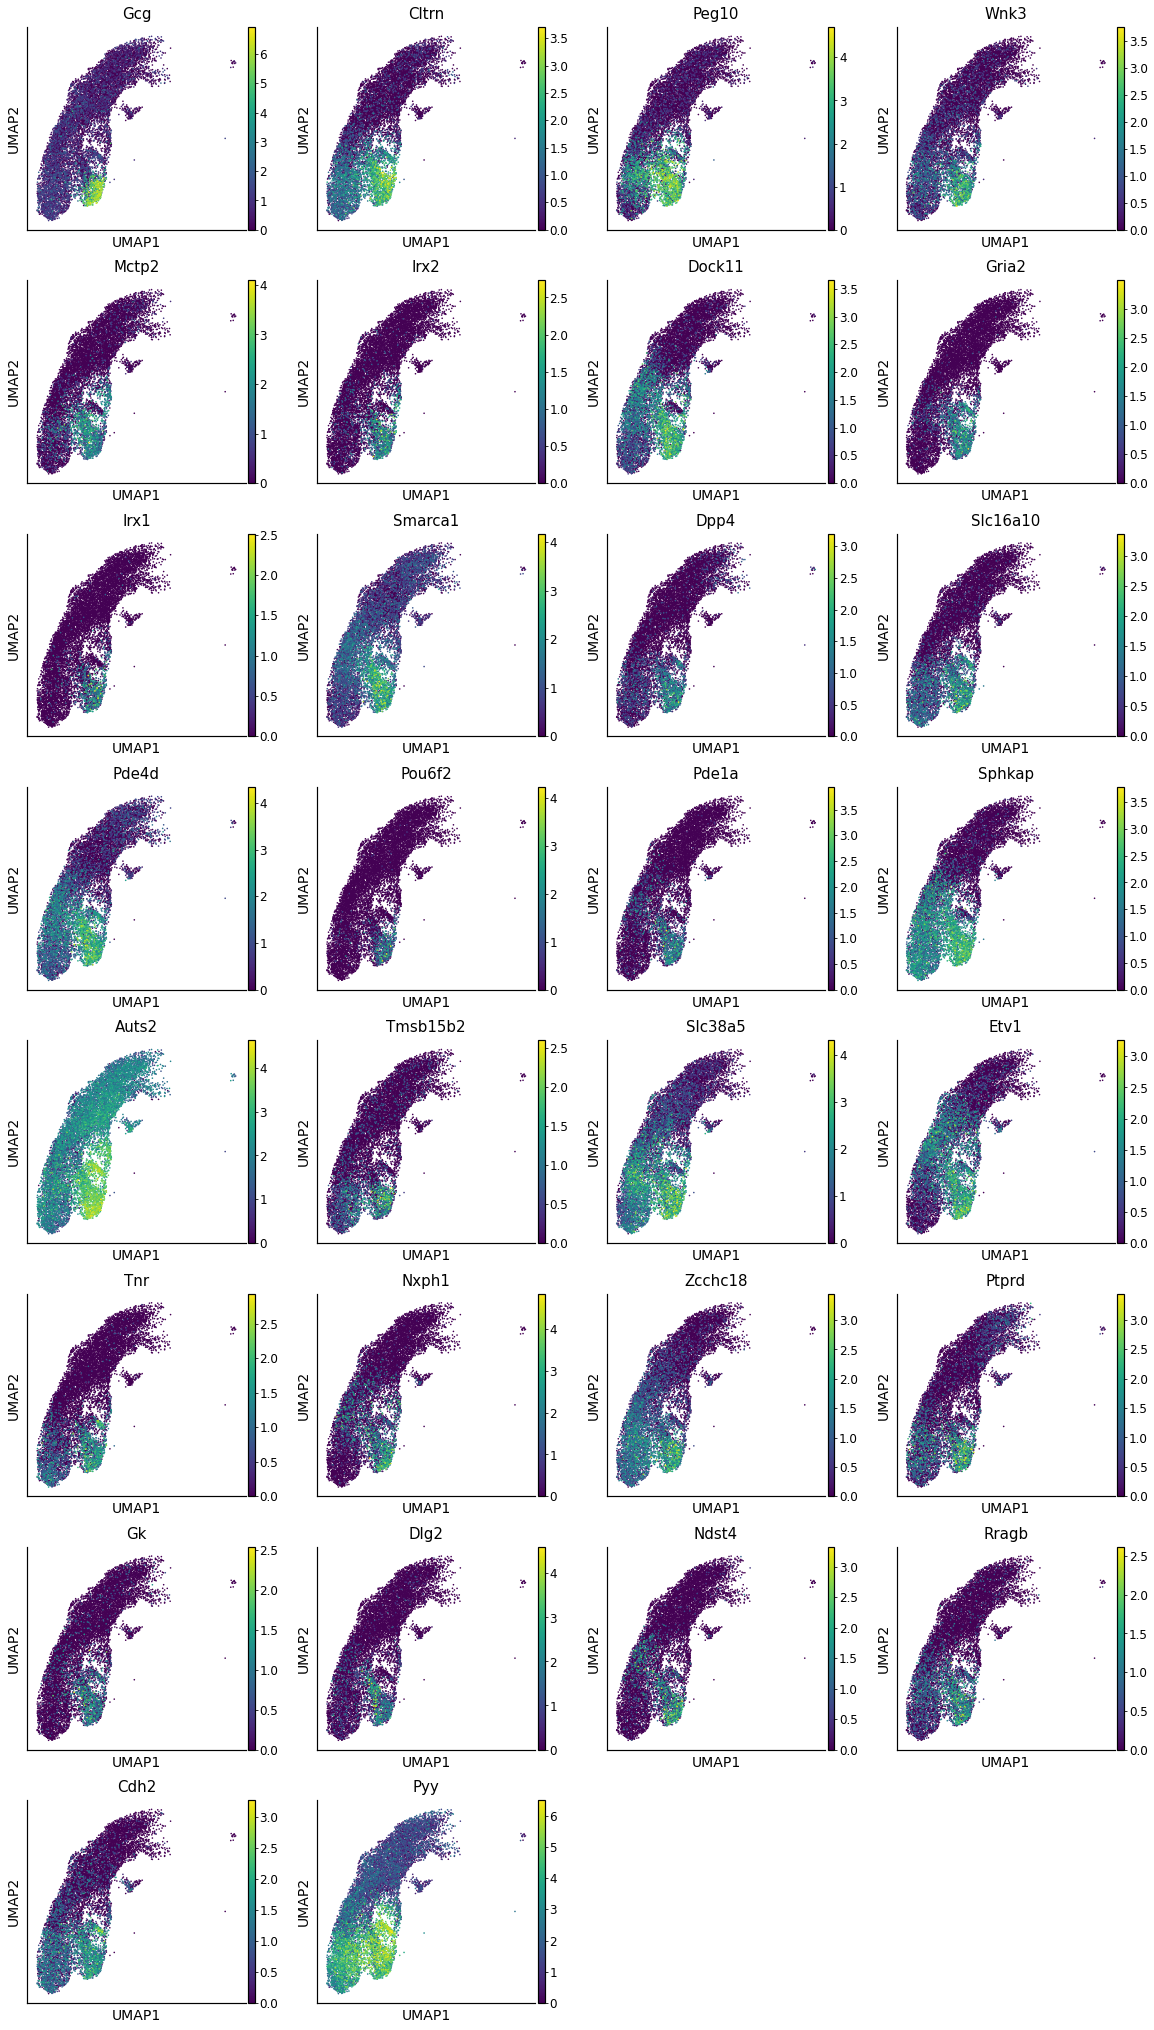

In [13]:
sc.pl.umap(tp0.adata, color=alpha_drivers.index[:30])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

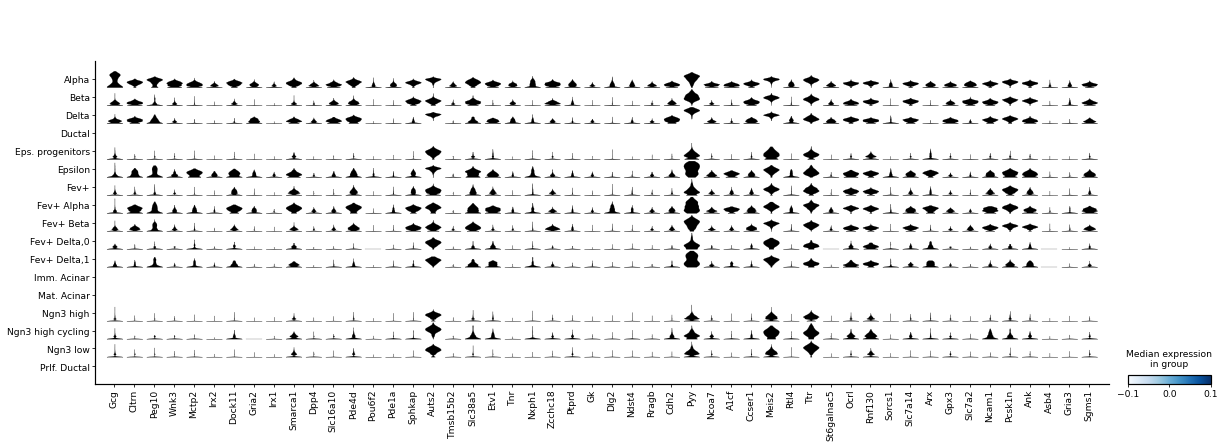

In [14]:
sc.pl.stacked_violin(tp0.adata, alpha_drivers.index[:50], groupby="cell_type_refined")

In [15]:
#sc.pl.umap(adata_gex, color=alpha_drivers.index[:30])

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

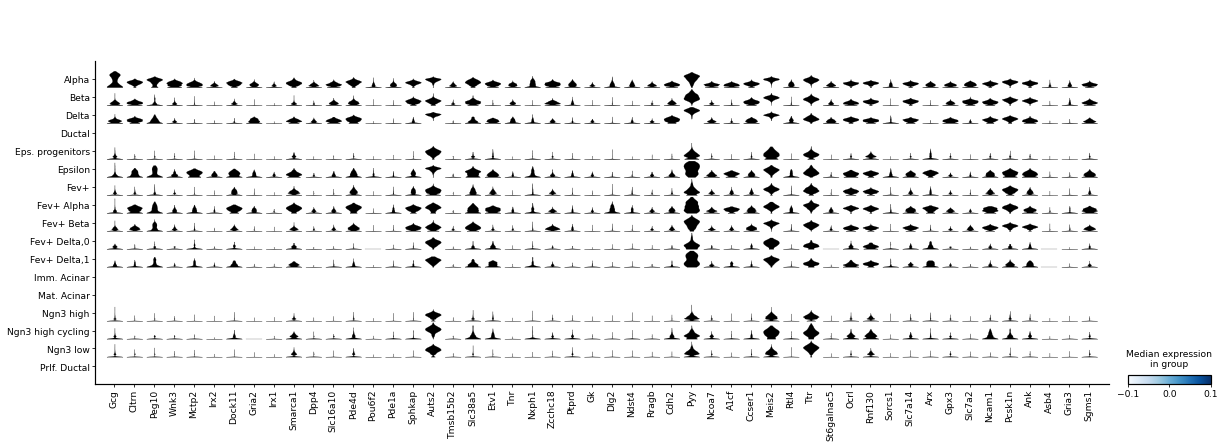

In [16]:
sc.pl.stacked_violin(tp0.adata, alpha_drivers.index[:50], groupby="cell_type_refined")

In [17]:
alpha_drivers.loc[["Irx2", "Irx1", "Mctp2", "Dock11", "A1cf", "Peg10"]]

,Alpha_pull_adapted_corr,Alpha_pull_adapted_pval,Alpha_pull_adapted_qval,Alpha_pull_adapted_ci_low,Alpha_pull_adapted_ci_high
Irx2,0.561083,0.000000e+00,0.000000e+00,0.542143,0.579453
Irx1,0.537833,0.000000e+00,0.000000e+00,0.518199,0.556900
Mctp2,0.580220,0.000000e+00,0.000000e+00,0.561874,0.597996
Dock11,0.543826,0.000000e+00,0.000000e+00,0.524368,0.562716
A1cf,0.429477,1.118362e-239,6.812856e-237,0.407015,0.451420
Peg10,0.595437,0.000000e+00,0.000000e+00,0.577578,0.612726


In [18]:
genes_selected = ["Irx2", "Irx1", "Mctp2", "Dock11", "A1cf", "Peg10"]

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


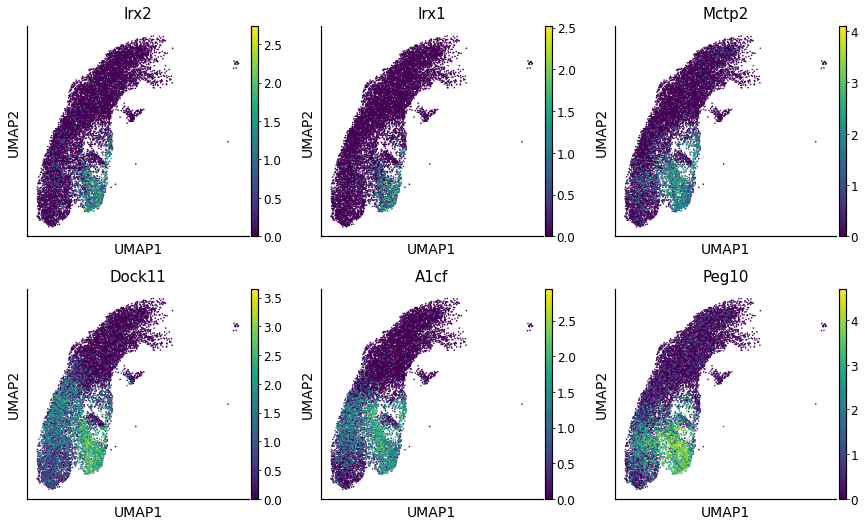

In [19]:
sc.pl.umap(tp0.adata, color=genes_selected, ncols=3)

In [20]:
order_celltypes = ['Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high,0', 'Ngn3 high,1', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta,0', 'Fev+ Delta,1', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [21]:
tp0.adata.obs["cell_type_refined"] = tp0.adata.obs["cell_type_refined"].cat.set_categories(order_celltypes)

/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/scanpy/plotting/_stacked_violin.py:324: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  _color_df = _matrix.groupby(level=0).median()
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/icb/dominik.klein/mambaforge/envs/moscot_up/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the fut

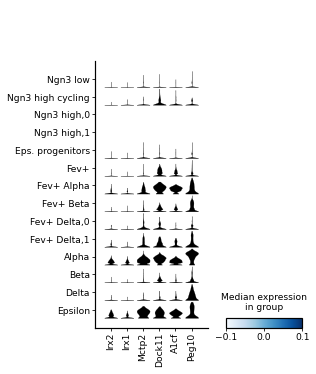

In [22]:
sc.pl.stacked_violin(tp0.adata, var_names=genes_selected, groupby="cell_type_refined")

In [23]:
alpha_drivers.to_csv(os.path.join(output_dir, "drivers_eps_to_alpha_genes.csv"))